In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for data visualazation
import matplotlib.pyplot as plt # for drawing grpahs and scaling graphs



In [7]:
df = pd.read_csv('cities_air_quality_water_pollution.18-10-2021 (1).csv')
df.head()

,City,"""Region""","""Country""","""AirQuality""","""WaterPollution"""
0,New York City,"""New York""","""United States of America""",46.816038,49.504950
1,"Washington, D.C.","""District of Columbia""","""United States of America""",66.129032,49.107143
2,San Francisco,"""California""","""United States of America""",60.514019,43.000000
3,Berlin,"""""","""Germany""",62.364130,28.612717
4,Los Angeles,"""California""","""United States of America""",36.621622,61.299435


In [8]:
list(df.columns)

['City', ' "Region"', ' "Country"', ' "AirQuality"', ' "WaterPollution"']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               3963 non-null   object 
 1    "Region"          3963 non-null   object 
 2    "Country"         3963 non-null   object 
 3    "AirQuality"      3963 non-null   float64
 4    "WaterPollution"  3963 non-null   float64
dtypes: float64(2), object(3)
memory usage: 154.9+ KB


In [10]:
df.shape

(3963, 5)

In [11]:
df.describe()

,"""AirQuality""","""WaterPollution"""
count,3963.000000,3963.000000
mean,62.253452,44.635372
std,30.944753,25.663910
min,0.000000,0.000000
25%,37.686567,25.000000
50%,69.444444,50.000000
75%,87.500000,57.719393
max,100.000000,100.000000


In [14]:
#Renomeando colunas
df = df.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)

df = df.rename(columns=lambda x: x.replace('"', ''))
df.describe()

,AirQuality,WaterPollution
count,3963.000000,3963.000000
mean,62.253452,44.635372
std,30.944753,25.663910
min,0.000000,0.000000
25%,37.686567,25.000000
50%,69.444444,50.000000
75%,87.500000,57.719393
max,100.000000,100.000000


In [15]:
#Checar valores null
df.isnull().sum()

City               0
 Region            0
 Country           0
 AirQuality        0
 WaterPollution    0
dtype: int64

In [16]:
df.duplicated().any()

False

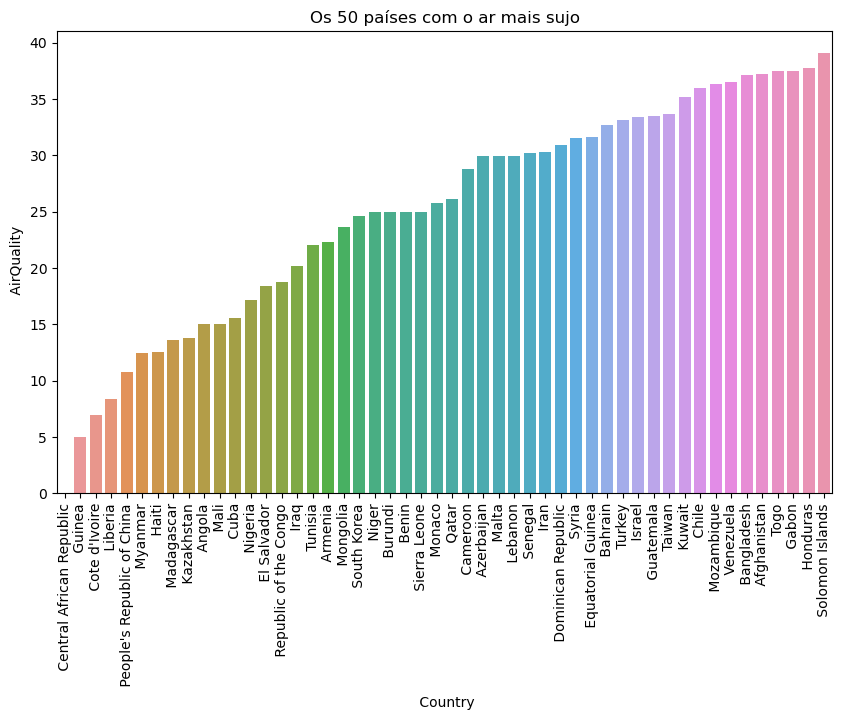

In [17]:
bottom_50_air = df.groupby(' Country')[' AirQuality'].mean().sort_values(ascending=True).head(50)


plt.figure(figsize=(10,6))

sns.barplot(x=bottom_50_air.index, y=bottom_50_air )
plt.xticks(rotation=90)
plt.title("Os 50 países com o ar mais sujo")
plt.show()

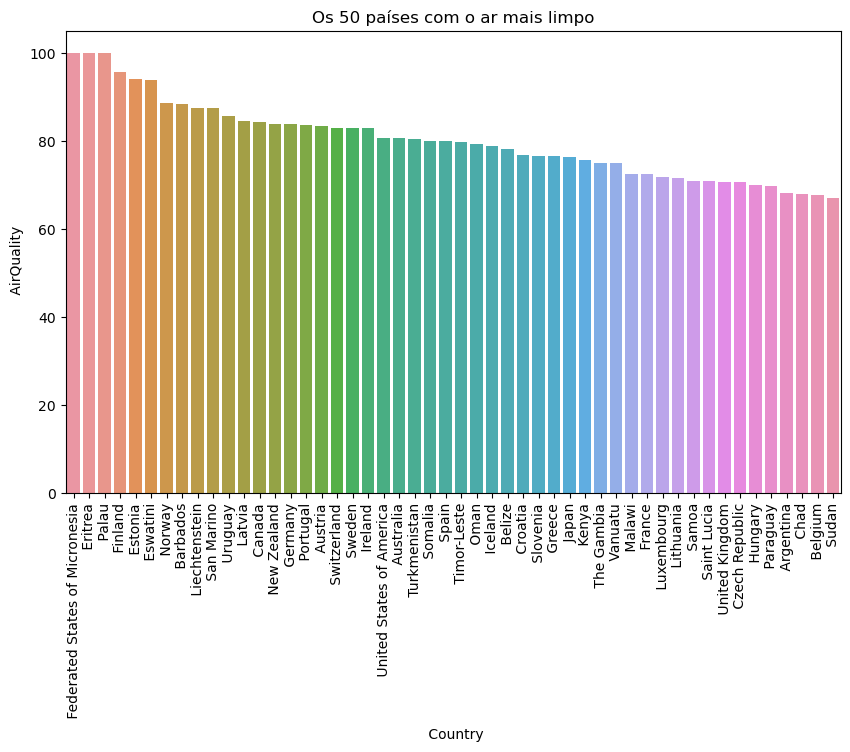

In [18]:
top_50_air = df.groupby(' Country')[' AirQuality'].mean().sort_values(ascending=False).head(50)

plt.figure(figsize=(10,6))

sns.barplot(x=top_50_air.index, y=top_50_air)
plt.xticks(rotation=90)
plt.title("Os 50 países com o ar mais limpo")
plt.show()

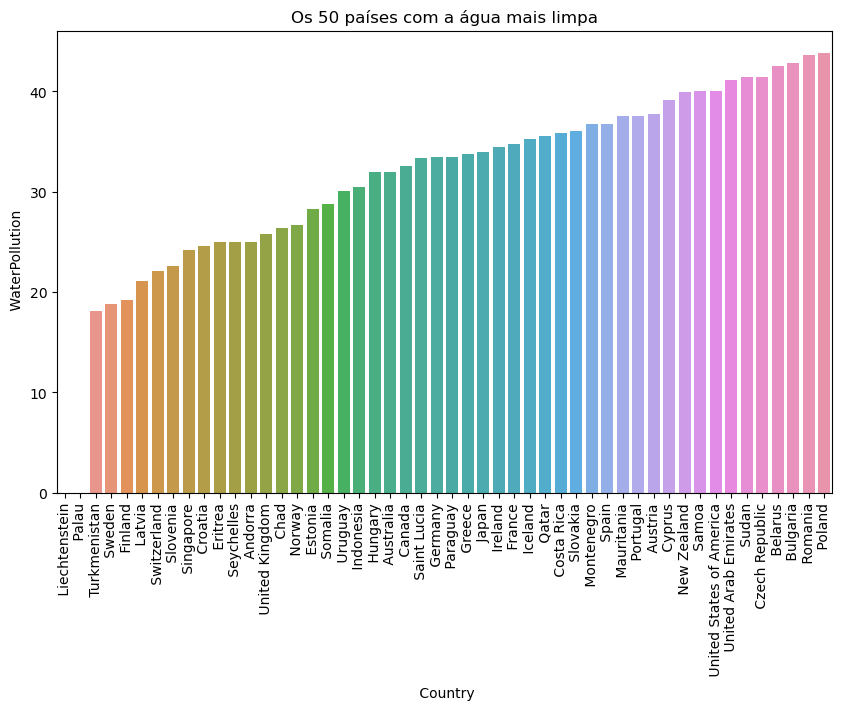

In [19]:
bottom_50_water = df.groupby(' Country')[' WaterPollution'].mean().sort_values(ascending=True).head(50)


plt.figure(figsize=(10,6))

sns.barplot(x=bottom_50_water.index, y=bottom_50_water)
plt.xticks(rotation=90)
plt.title("Os 50 países com a água mais limpa")
plt.show()

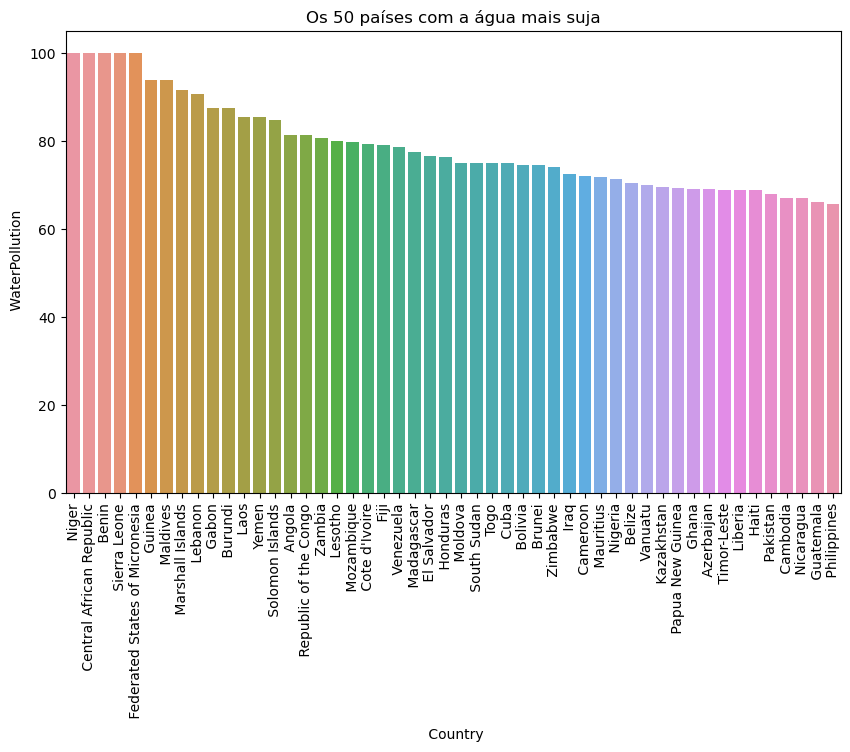

In [21]:
top_50_water = df.groupby(' Country')[' WaterPollution'].mean().sort_values(ascending=False).head(50)

plt.figure(figsize=(10,6))

#lets plot our graph using seaborn
sns.barplot(x=top_50_water.index, y=top_50_water)
plt.xticks(rotation=90)
plt.title("Os 50 países com a água mais suja")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


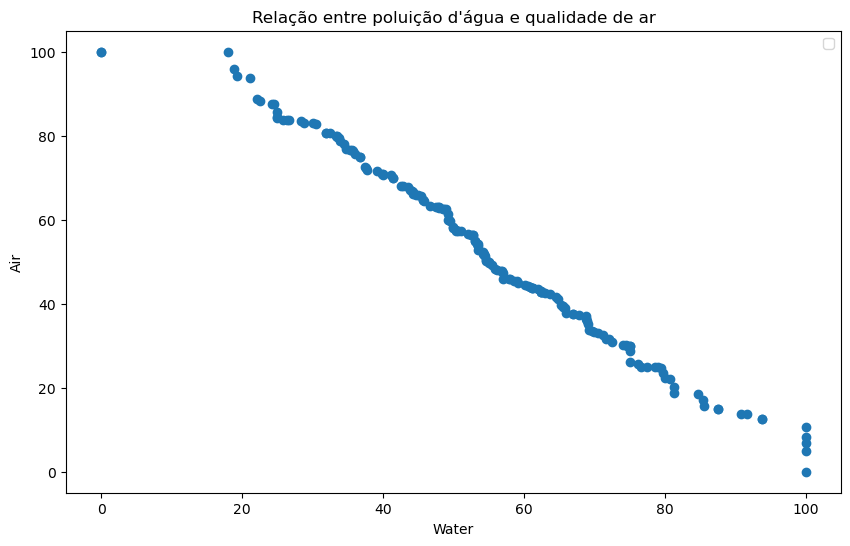

In [22]:
all_air = df.groupby(' Country')[' AirQuality'].mean().sort_values(ascending=False)

all_water = df.groupby(' Country')[' WaterPollution'].mean().sort_values(ascending=True)


plt.figure(figsize=(10,6))
plt.scatter(all_water,all_air)
plt.xlabel('Water')
plt.ylabel('Air')
plt.title("Relação entre poluição d'água e qualidade de ar")
plt.legend()
plt.show()

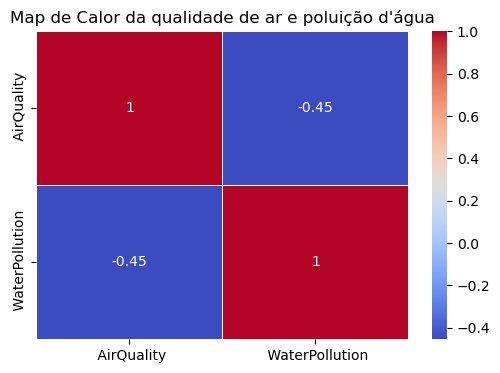

In [23]:
water_air =[' AirQuality',' WaterPollution']
df1=df[water_air].corr()
# Plotting a heatmap'
plt.figure(figsize=(6, 4))
sns.heatmap(df1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Map de Calor da qualidade de ar e poluição d'água")
plt.show()

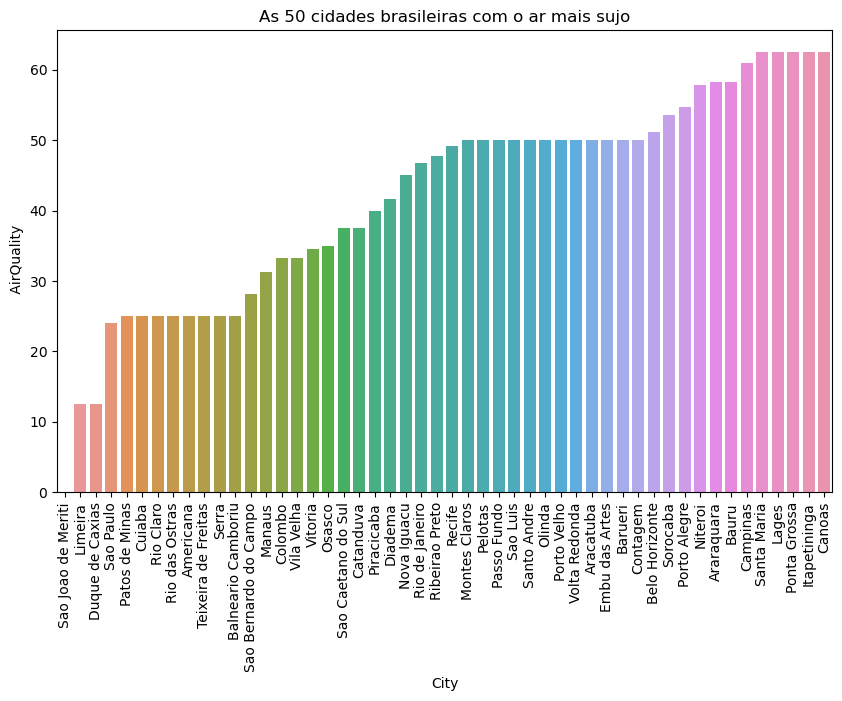

In [24]:
cidadesBR = df.loc[df[' Country'] == ' Brazil']

bottom50cidadear = cidadesBR.groupby('City')[' AirQuality'].mean().sort_values(ascending=True).head(50)
plt.figure(figsize=(10,6))

sns.barplot(x=bottom50cidadear.index, y=bottom50cidadear)
plt.xticks(rotation=90)
plt.title("As 50 cidades brasileiras com o ar mais sujo")
plt.show()

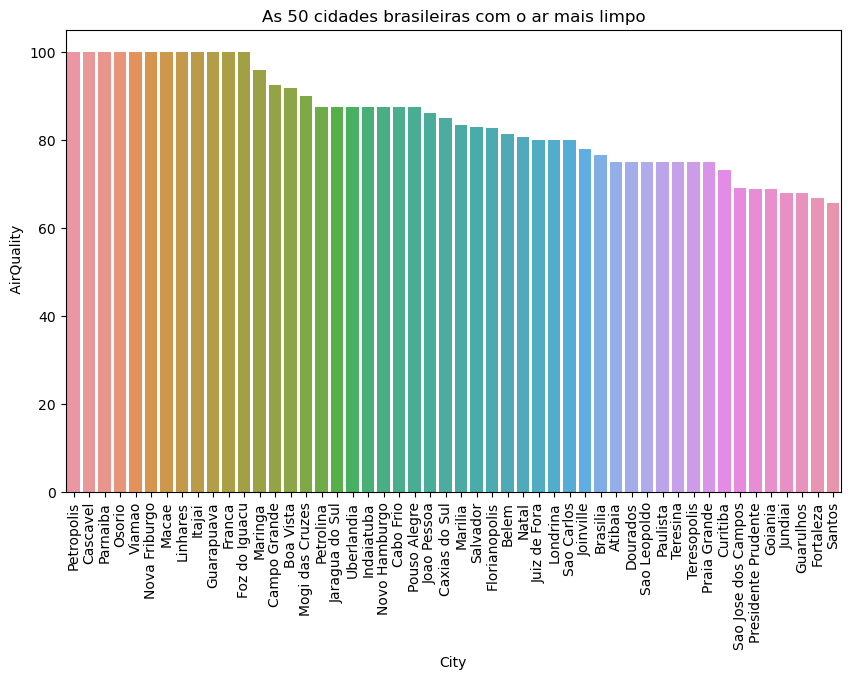

In [25]:
top50cidadear = cidadesBR.groupby('City')[' AirQuality'].mean().sort_values(ascending=False).head(50)
plt.figure(figsize=(10,6))

sns.barplot(x=top50cidadear.index, y=top50cidadear)
plt.xticks(rotation=90)
plt.title("As 50 cidades brasileiras com o ar mais limpo")
plt.show()

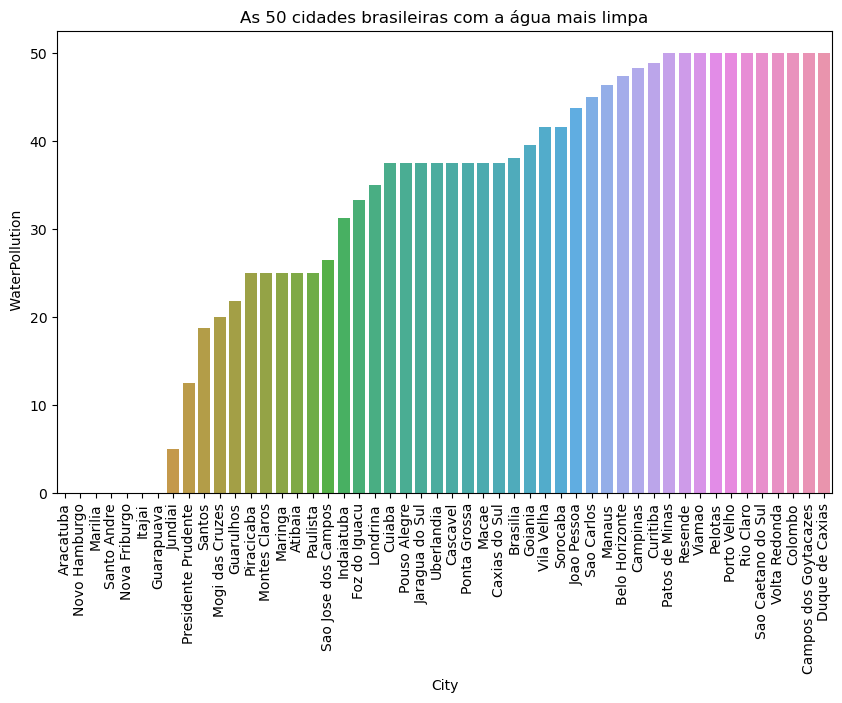

In [26]:
top50cidadeagua = cidadesBR.groupby('City')[' WaterPollution'].mean().sort_values(ascending=True).head(50)
plt.figure(figsize=(10,6))

sns.barplot(x=top50cidadeagua.index, y=top50cidadeagua)
plt.xticks(rotation=90)
plt.title("As 50 cidades brasileiras com a água mais limpa")
plt.show()

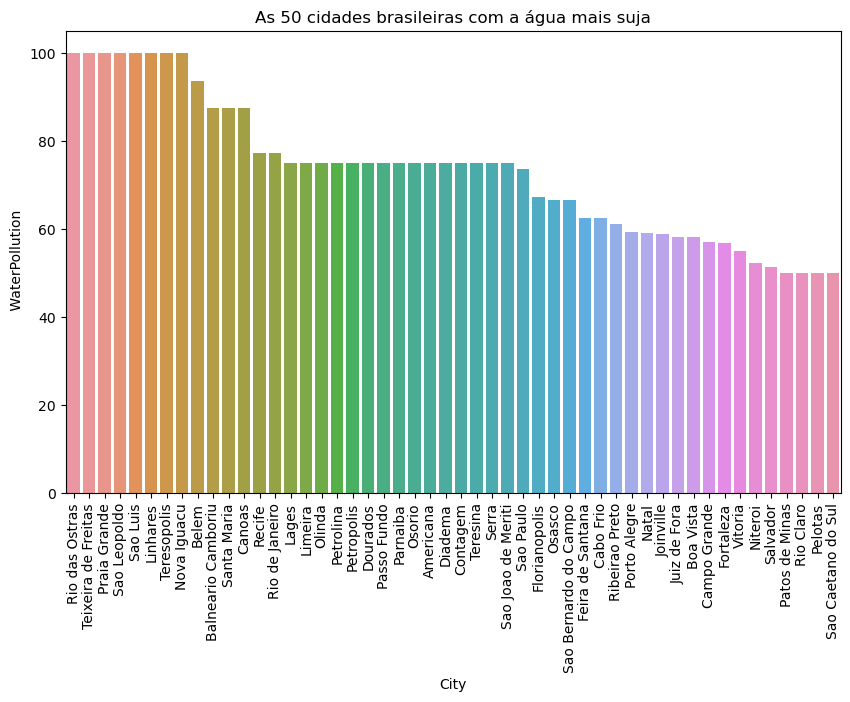

In [27]:
bottom50cidadeagua = cidadesBR.groupby('City')[' WaterPollution'].mean().sort_values(ascending=False).head(50)
plt.figure(figsize=(10,6))

sns.barplot(x=bottom50cidadeagua.index, y=bottom50cidadeagua)
plt.xticks(rotation=90)
plt.title("As 50 cidades brasileiras com a água mais suja")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


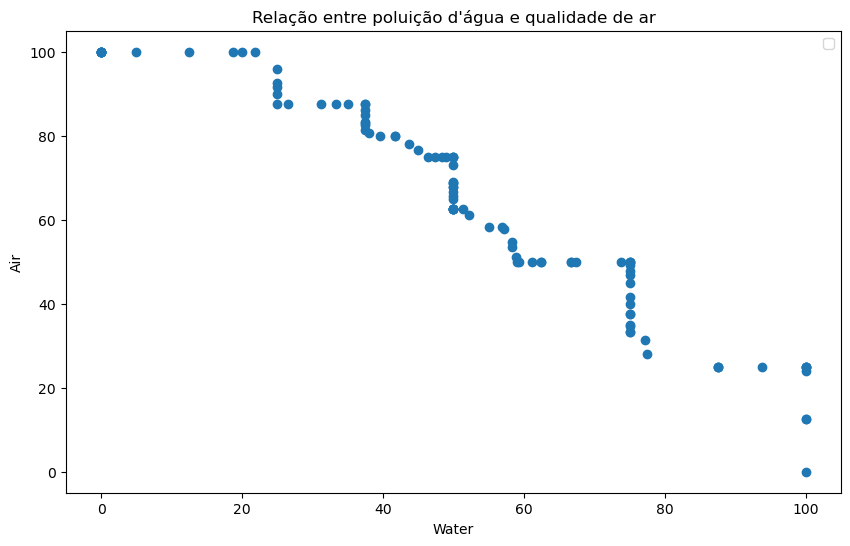

In [28]:
all_air_cidade = cidadesBR.groupby('City')[' AirQuality'].mean().sort_values(ascending=False)

all_water_cidade = cidadesBR.groupby('City')[' WaterPollution'].mean().sort_values(ascending=True)


plt.figure(figsize=(10,6))
plt.scatter(all_water_cidade,all_air_cidade)
plt.xlabel('Water')
plt.ylabel('Air')
plt.title("Relação entre poluição d'água e qualidade de ar")
plt.legend()
plt.show()

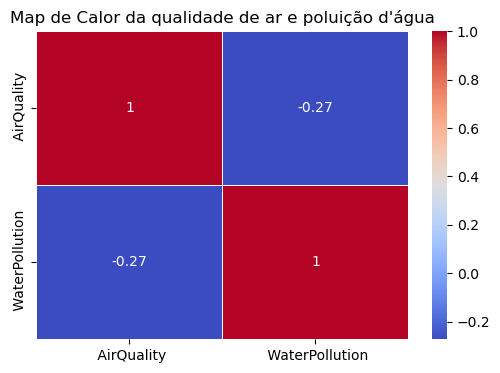

In [29]:
water_air =[' AirQuality',' WaterPollution']
df1=cidadesBR[water_air].corr()
# Plotting a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Map de Calor da qualidade de ar e poluição d'água")
plt.show()